First, import modules

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot
import random
import math
import time
from IPython.display import clear_output

Define the state. 0 is cooperate, 1 is defect. The state is therefore (in binary) 00 for CC, 01 for CD, 10 for DC and 11 for DD

In [2]:
def advance(action1, action2):
  newstate = 2*action1 + action2
  return newstate



Secondly, set up the rewards matrix. This is set up so reward[state][playernumber] returns the reward for that player

In [3]:
#rewards = [[-1, -1],[-3, 0],[0, -3],[-2, -2],[0,0]]
#[[-0.1, -0.1],[-0.3, 0],[0, -0.3],[-0.2, -0.2],[0,0]]
rewards = [[3, 3],[0, 5],[5, 0],[1, 1],[0,0]]


Next we define parameters for the epsilon greedy function

In [4]:
#Learning rate
alpha1 = 0.01
alpha2 = 0.01

#Discount factor. 0 means future rewards not considered
gamma1 = 0.95
gamma2 = 0.95

#Exploration rate. Higher means more random exploration
epsilon1 = 0.01
epsilon2 = 0.01

Next, we create the epsilon greedy function. This takes the Q values and state, and returns an action. 

If a random value between 0 and 1 is bigger then epsilon, then choose the biggest Q, else choose a random action

In [5]:
def epsilongreedy(Q, state, e):
  randval = random.random()
  Qvals_for_state = Q[state,:]

  if randval > e and not Qvals_for_state[0] == Qvals_for_state[1]:
    
    action = np.argmax(Qvals_for_state)

  else:
    action = random.randrange(Qvals_for_state.size)

  return action


In [6]:
def stochastic_choose(Q, state, t):
  Qvals_for_state = Q[state,:].copy()
  randval = random.random()

  boundary = np.exp(Qvals_for_state[0]/t)/np.exp((Qvals_for_state[0]/t)+np.exp(Qvals_for_state[1]/t))

  if randval < boundary:
    return 0

  else:
    return 1

In [7]:
def transformstate(state):
  if state == 1:
    transformedstate = 2
  elif state == 2:
    transformedstate = 1
  else: transformedstate = state
  return transformedstate

def transformQ(Q):
  transformedQ = Q.copy()
  transformedQ[2] = Q[1].copy()
  transformedQ[1] = Q[2].copy()
  return transformedQ

In [8]:
def TFT_check(Q):
  if Q[0][0] > Q[0][1] and Q[1][0] < Q[1][1] and Q[2][0] > Q[2][1] and Q[3][0] < Q[3][1] and Q[4][0] > Q[4][1]:
    return 1
  else:
    return 0

def Co_op_check(Q):
  if Q[0][0] > Q[0][1] and Q[2][0] > Q[2][1] and Q[4][0] > Q[4][1]:
    return 1
  else:
    return 0

def Grim_check(Q):
  if Q[0][0] > Q[0][1] and Q[1][0] < Q[1][1] and Q[2][0] < Q[2][1] and Q[3][0] < Q[3][1] and Q[4][0] > Q[4][1]:
    return 1
  else:
    return 0



In [9]:
def strategy_classify(Q):
    out = ""
    for n in range(5):
        if Q[n][0] > Q[n][1] :
            out += "C"
        else:
            out += "D"
    return out

In [10]:
def two_strat_classify(Q2,Q1):
    out = 0

    if np.array_equal(Q2, np.zeros([5,2])):
        return 1024
    
    else:
        for i in range(5):
            if Q1[i][0] < Q1[i][1] :
                out += 2**i

        for i in range(5):
            if Q2[i][0] < Q2[i][1] :
                out += 2**(i+5)

        return out


In [12]:
print(two_strat_classify(Q_zero,Q_zero))

1024


In [11]:
#Grim Trigger:
grim_trigger = np.array([[29.99999, 0], [0, 29.9999], [0, 29.9999], [0, 29.9999], [29.9999, 0]])

#TFT
TFT1 = np.array([[100.0, 60.0], [60.0, 100.0], [100.0, 60.0], [60.0, 100.0], [100.0, 60.0]])
TFT2 = np.array([[100.09, 60.0], [100.0, 60.0], [60.0, 100.0], [60.0, 100.0], [100.0, 60.0]])

#Always Coop
always_CoOp = np.array([[100.0, 60.0], [100.0, 60.0], [100.0, 60.0], [100.0, 60.0], [100.0, 60.0]])

#Always Defect
always_defect = np.array([[19.4, 20.4], [19.4, 20.4], [19.4, 20.4], [19.4, 20.4], [19.4, 20.4]])

#Zero
Q_zero = np.zeros([5,2])

#Pavlov
Pavlov = np.array([[100.0, 60.0], [60.0, 100.0], [60.0, 100.0], [100.0, 60.0], [100.0, 60.0]])

D = np.array([[0, 1]])
C = np.array([[1,0]])


next we do Q learning

In [13]:
def Qlearning(rewards, num_episodes, num_steps, alpha1, alpha2, gamma1, gamma2, epsilon1, epsilon2, debug = False, Q_Player_A_preset = TFT1, Q_Player_B_preset = TFT2):
  Q_Player_A = Q_Player_A_preset.copy()
  Q_Player_B = Q_Player_B_preset.copy()
  episode_rewards_A = []
  episode_rewards_B = []


  for episode in range(num_episodes):
    episode_reward_A = 0
    episode_reward_B = 0
    state = 4 #set default initial state
    
    for step in range(num_steps):
      actionA = epsilongreedy(Q_Player_A, state, epsilon1)
      actionB = epsilongreedy(Q_Player_B, state, epsilon2)
      next_state = advance(actionA, actionB)

      reward_A = rewards[next_state][0]
      episode_reward_A += reward_A

      reward_B = rewards[next_state][1]
      episode_reward_B += reward_B
      
  
      
      
      state = next_state
    episode_rewards_A.append(episode_reward_A)
    episode_rewards_B.append(episode_reward_B)
    

    
  return episode_rewards_A, episode_rewards_B

In [20]:
episode_rewards_A, episode_rewards_B = Qlearning(rewards, 200000, 50, alpha1, alpha2, gamma1, gamma2, epsilon1,  epsilon2, False, Q_zero,Q_zero)     #Set the bool to false to run Q learning, true to see what it does at every step. Input Q as the last input to keep learned variables and remove it to learn from scratch
#Q_A, Q_B, episode_rewards_A, episode_rewards_B, TFT_A, TFT_B, CoOp_A, CoOp_B, Grim_A, Grim_B, Q_A_Array, Q_B_Array = Qlearning(rewards, 100000, 50, alpha1, alpha2, gamma1, gamma2, epsilon1,  epsilon2, False, Q_A,Q_A)
#Q_A, Q_B, episode_rewards_A, episode_rewards_B = Qlearning(rewards, 10000, 10, alpha1, alpha2, gamma1, gamma2, epsilon1,  epsilon2, False, np.zeros((5, 2)), np.zeros((5, 2)))



In [21]:
print(episode_rewards_A[0:10])


[132, 97, 91, 143, 128, 101, 90, 106, 110, 108]


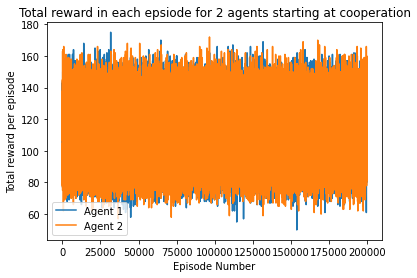

In [22]:
matplotlib.pyplot.plot(episode_rewards_A, label = "Agent 1")

matplotlib.pyplot.plot(episode_rewards_B, label = "Agent 2")
matplotlib.pyplot.title("Total reward in each epsiode for 2 agents starting at cooperation")
matplotlib.pyplot.xlabel("Episode Number")
matplotlib.pyplot.ylabel("Total reward per episode")
matplotlib.pyplot.legend()

In [17]:
Rewards_A = np.zeros(1024)
Rewards_B = np.zeros(1024)

In [24]:
print(np.concatenate((C,C),axis=0))
print(always_defect)

[[1 0]
 [1 0]]
[[19.4 20.4]
 [19.4 20.4]
 [19.4 20.4]
 [19.4 20.4]
 [19.4 20.4]]


In [36]:
All_strats = np.array([])

In [79]:
rewards_A = []
rewards_B = []

for num_row in range(1024): 
    A_strat = np.array([[]])
    B_strat = np.array([[]])
    strats = C
    temp = num_row
    #print(temp)
    if temp >= 2**(9):
        temp = temp - 2**(9)
        strats = D
    else:
        strats = C

    for digit in range(9):
        #print(digit)
        #print(temp-2^(8-digit))
        if temp >= 2**(8-digit):
            temp = temp - 2**(8-digit)
            strats = np.concatenate((D, strats),axis=0)
        else:
            strats = np.concatenate((C, strats),axis=0)
        #print(temp)
    print(strats)

    episode_rewards_A, episode_rewards_B= Qlearning(rewards, 50000, 50, alpha1, alpha2, gamma1, gamma2, epsilon1,  epsilon2, False, strats[0:5,:],strats[5:10,:])
    rewards_A.append(np.average(episode_rewards_A)/50)
    rewards_B.append(np.average(episode_rewards_B)/50)
    print(num_row)




[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
0
[[0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
1
[[1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
2
[[0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
3
[[1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
4
[[0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
5
[[1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
6
[[0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
7
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
8
[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
9
[[1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
10
[[0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
11
[[1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
12
[[0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]

In [81]:
print(rewards_B)

[2.9948624, 1.5190804, 2.9807204, 1.513382, 2.7019652, 0.0937312, 2.4539348000000003, 0.0935516, 2.9949795999999997, 1.5171728, 2.9804616, 1.5116728000000001, 2.6815952, 0.0799768, 2.413074, 0.0793832, 2.9353216, 1.5030828, 2.9212668, 1.5015536, 0.6023132, 0.0346676, 0.561372, 0.0345524, 2.935086, 1.4981764000000002, 2.9206308, 1.4960792, 0.3336392, 0.020186000000000003, 0.303672, 0.0199808, 3.9744612, 2.0137156, 2.7033199999999997, 2.0040964, 3.7714483999999997, 1.8174428, 0.2372148, 1.6513832, 3.9642928, 1.3714776, 2.6949076, 1.3666288, 3.5555164, 0.1045412, 0.2016912, 0.10359159999999999, 3.8861435999999996, 1.985988, 2.6271852, 1.9762492, 0.818086, 0.4021208, 0.082138, 0.38268599999999997, 3.8771983999999997, 1.3473768000000002, 2.6158552, 1.3444568000000001, 0.4394036, 0.024918, 0.043841599999999994, 0.024895200000000003, 3.1882752, 1.6922088, 2.9853528, 1.5159955999999999, 2.9123636, 0.1185896, 2.695258, 0.0946636, 3.183498, 1.6922536, 2.9712396, 1.5119864, 2.8563780000000003, 0.

In [59]:
Q_A = strats[0:5,:]
Q_B = strats[5:10,:]
print(Q_A)
print(Q_B)

[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]
[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [ ]:
Q_A, Q_B, episode_rewards_A, episode_rewards_B, TFT_A, TFT_B, CoOp_A, CoOp_B, Grim_A, Grim_B, Q_A_Array, Q_B_Array, strat_transition = Qlearning(rewards, 500000, 50, alpha1, alpha2, gamma1, gamma2, epsilon1,  epsilon2, False, Q_zero,Q_zero)
    transitionmatrix += strat_transition

In [130]:
np.savetxt("QTransition_one_episode.csv", strat_transition, delimiter=",")

Text(0, 0.5, 'Will Q choose TFT ignoring randomness?')

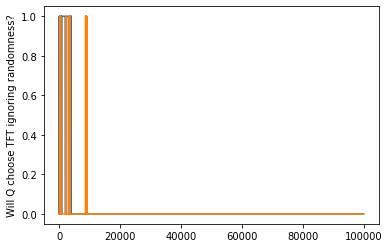

In [56]:
matplotlib.pyplot.plot(TFT_A)
matplotlib.pyplot.plot(TFT_B)
matplotlib.pyplot.ylabel("Will Q choose TFT ignoring randomness?")

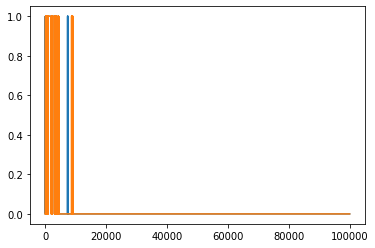

In [57]:
matplotlib.pyplot.plot(CoOp_A)
matplotlib.pyplot.plot(CoOp_B)

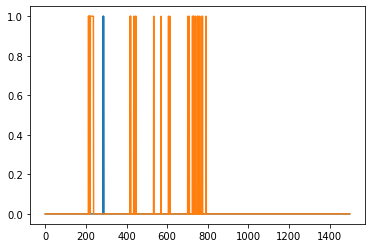

In [16]:
matplotlib.pyplot.plot(Grim_A)
matplotlib.pyplot.plot(Grim_B)

In [72]:
print(grim_trigger)

[[29.99999  0.     ]
 [ 0.      29.9999 ]
 [ 0.      29.9999 ]
 [ 0.      29.9999 ]
 [29.9999   0.     ]]


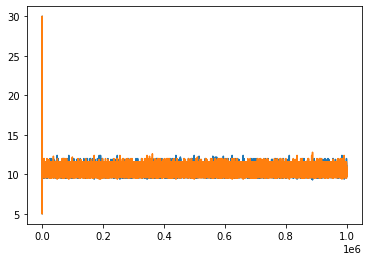

In [18]:
rewards_averaged_A = []
counter = 0
for count in range(len(episode_rewards_A)):
  counter += episode_rewards_A[count]
  if count % 10 == 9:
    rewards_averaged_A.append(counter/10)
    counter = 0

rewards_averaged_B = []
counter = 0
for count in range(len(episode_rewards_B)):
  counter += episode_rewards_B[count]
  if count % 10 == 9:
    rewards_averaged_B.append(counter/10)
    counter = 0
matplotlib.pyplot.plot(rewards_averaged_A)
matplotlib.pyplot.plot(rewards_averaged_B)

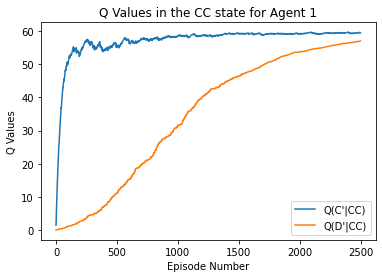

In [72]:
#CC
fig = matplotlib.pyplot.figure()
matplotlib.pyplot.plot(Q_A_Array[:,0,0], label = "Q(C'|CC)")
matplotlib.pyplot.plot(Q_A_Array[:,0,1], label = "Q(D'|CC)")
matplotlib.pyplot.title("Q Values in the CC state for Agent 1")
matplotlib.pyplot.xlabel("Episode Number")
matplotlib.pyplot.ylabel("Q Values")
matplotlib.pyplot.legend()
#fig.savefig("GrimCCSS.eps")

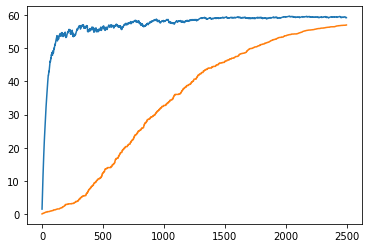

In [73]:
#CC agent2

matplotlib.pyplot.plot(Q_B_Array[:,0,0])
matplotlib.pyplot.plot(Q_B_Array[:,0,1])

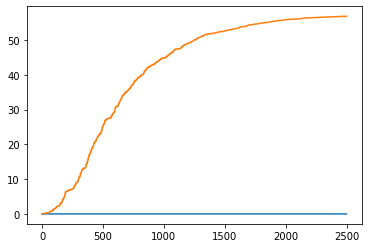

In [74]:
#CD

matplotlib.pyplot.plot(Q_A_Array[:,1,0])
matplotlib.pyplot.plot(Q_A_Array[:,1,1])

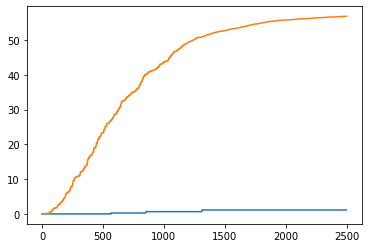

In [75]:
#DC

matplotlib.pyplot.plot(Q_A_Array[:,2,0])
matplotlib.pyplot.plot(Q_A_Array[:,2,1])

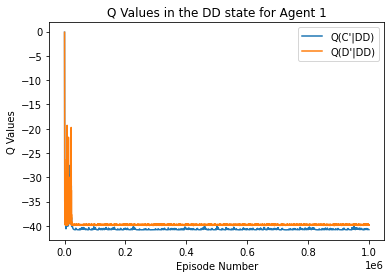

In [81]:
#DD
fig = matplotlib.pyplot.figure()
matplotlib.pyplot.plot(Q_A_Array[:,3,0], label = "Q(C'|DD)")
matplotlib.pyplot.plot(Q_A_Array[:,3,1], label = "Q(D'|DD)")
matplotlib.pyplot.title("Q Values in the DD state for Agent 1")
matplotlib.pyplot.xlabel("Episode Number")
matplotlib.pyplot.ylabel("Q Values")
matplotlib.pyplot.legend()
#fig.savefig("GrimDDSS.eps")

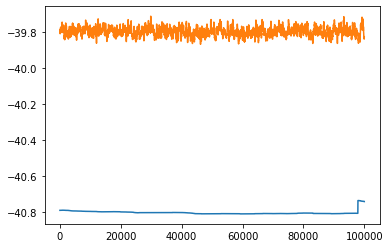

In [70]:
#Initial

matplotlib.pyplot.plot(Q_A_Array[:,4,0])
matplotlib.pyplot.plot(Q_A_Array[:,4,1])

In [40]:
import csv
header = ["Init-C","Init-D","CC-C","CC-D", "CD-C", "CD-D", "DC-C", "DC-D", "DD-C", "DD-D","epsilonlst"]
# open the file in the write mode
with open('MeasuredQsPav.csv', 'w',encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for eps2 in range(1001):
        Q_A, Q_B, episode_rewards_A, episode_rewards_B, TFT_A, TFT_B, CoOp_A, CoOp_B, Grim_A, Grim_B, Q_A_Array, Q_B_Array = Qlearning(rewards, 10000, 50, 0.01, 0, 0.95, 0.9, 0.2,  eps2/1000, False, Q_zero, Pavlov)
        
        CC0=Q_A[0,0]
        CC1=Q_A[0,1]
        CD0=Q_A[1,0]
        CD1=(Q_A[1,1])
        DC0=(Q_A[2,0])
        DC1=(Q_A[2,1])
        DD0=(Q_A[3,0])
        DD1=(Q_A[3,1])
        Init0=(Q_A[4,0])
        Init1=(Q_A[4,1])
        writer.writerow([  Init0,Init1,CC0,CC1, CD0, CD1, DC0, DC1, DD0, DD1,eps2/1000])

    


In [ ]:
import csv
header = ["1Init-C","1Init-D","1CC-C","1CC-D", "1CD-C", "1CD-D", "1DC-C", "1DC-D", "1DD-C", "1DD-D","2Init-C","2Init-D","2CC-C","2CC-D", "2CD-C", "2CD-D", "2DC-C", "2DC-D", "2DD-C", "2DD-D","ep_num"]
Q_A = Q_zero
Q_B = Q_zero
# open the file in the write mode
with open('Coopstability.csv', 'w',encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for eps2 in range(1001):
        Q_A, Q_B, episode_rewards_A, episode_rewards_B, TFT_A, TFT_B, CoOp_A, CoOp_B, Grim_A, Grim_B, Q_A_Array = Qlearning(rewards, 10000, 50, 0.01, 0, 0.9, 0.9, 0.2,  eps2/1000, False, Q_zero, grim_trigger)
        
        CC0=d[0,0]
        CC1=d[0,1]
        CD0=d[1,0]
        CD1=(d[1,1])
        DC0=(d[2,0])
        DC1=(d[2,1])
        DD0=(d[3,0])
        DD1=(d[3,1])
        Init0=(Q_A[4,0])
        Init1=(Q_A[4,1])
        writer.writerow([Init0,Init1,CC0,CC1, CD0, CD1, DC0, DC1, DD0, DD1,eps2/1000])
